Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Подготовка данных.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
data_train = pd.read_csv("https://code.s3.yandex.net/datasets/gold_recovery_train.csv")
data_test = pd.read_csv("https://code.s3.yandex.net/datasets/gold_recovery_test.csv")
data_full = pd.read_csv("https://code.s3.yandex.net/datasets/gold_recovery_full.csv")

In [3]:
def preview(name, data):
    print(f"Данные по таблице {name}")
    print("Размер таблицы:", data.shape)
    print("Дубликатов:", data.duplicated().sum())
    display(data.head())
    print(data.info())
    print(data.isnull().sum())
    print(data.describe())
    print()


In [4]:
preview("train", data_train)
preview("test", data_test)
preview("full", data_full)

Данные по таблице train
Размер таблицы: (16860, 87)
Дубликатов: 0


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [5]:
# добавляем целевые признаки в тест
data_full.index = data_full['date']
for i in range(len(data_test)):
    data_test.loc[i, 'rougher.output.recovery'] = data_full.loc[data_test.loc[i, 'date'], 'rougher.output.recovery']
    data_test.loc[i, 'final.output.recovery'] = data_full.loc[data_test.loc[i, 'date'], 'final.output.recovery']


In [6]:
#переведем дату в соответствующий формат
def data_format(data):
    data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d %H:%M:%S')
    
data_format(data_train)
data_format(data_test)
data_format(data_full)

In [7]:
def recovery_mae(data):
    C = 'rougher.output.concentrate_au'
    F = 'rougher.input.feed_au'
    T = 'rougher.output.tail_au'
    data = data.dropna()  
    data['recovery'] = ((data[C]*(data[F] - data[T]))/(data[F]*(data[C] - data[T])))*100
    print("MAE:", mean_absolute_error(data['recovery'], data['rougher.output.recovery']))
    data['median'] = data['rougher.output.recovery'].median()
    print("Median MAE:", mean_absolute_error(data['rougher.output.recovery'], data['median']))

recovery_mae(data_full)
recovery_mae(data_train)

MAE: 9.896230308031929e-15
Median MAE: 6.609932491104842
MAE: 9.555596961987514e-15
Median MAE: 7.157084433900181


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

In [8]:
# удаляем выбросы, где вес сырья 0, разбираемся с отсутствующими значениями
def data_without_au(data):
    data = data[(data['rougher.input.feed_ag'] !=0) & (data['rougher.input.feed_pb'] !=0) & (data['rougher.input.feed_au'] != 0)]
    data = data[(data['rougher.input.feed_ag'] == data['rougher.input.feed_ag']) & (data['rougher.input.feed_pb'] == data['rougher.input.feed_pb']) & (data['rougher.input.feed_au'] ==data['rougher.input.feed_au'])]
    return data

data_train = data_without_au(data_train)
data_test = data_without_au(data_test)
data_full = data_without_au(data_full)

def data_without_target(data):
    data = data[(data['rougher.output.recovery'] == data['rougher.output.recovery'])]
    data =  data[(data['final.output.recovery'] == data['final.output.recovery'])]
    return data

data_full = data_without_target(data_full)
data_train = data_without_target(data_train)
data_test = data_without_target(data_test)

print(data_full.shape)
print(data_train.shape)
print(data_test.shape)

(19339, 87)
(14049, 87)
(5290, 55)


In [9]:
#т.к.соседние по времени параметры часто похожи, заполним пропуски на основе близжайшей даты
data_train = data_train.interpolate()
data_test = data_test.interpolate()
data_full = data_full.interpolate()

In [10]:
#сравним, какие столбцы отсутствуют в тестовых данных
list_full = data_full.columns.tolist()
list_test = data_test.columns.tolist()
list_abcent=list(set(list_full) ^ set(list_test))
#print(list_full)
#print(list_test)
print("Количество отсутствующих слолбцов в тестовой выборке:", len(list_abcent))
print()
print(list_abcent)

Количество отсутствующих слолбцов в тестовой выборке: 32

['primary_cleaner.output.tail_pb', 'final.output.tail_ag', 'final.output.concentrate_au', 'rougher.output.tail_ag', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.tail_sol', 'final.output.concentrate_pb', 'final.output.tail_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'primary_cleaner.output.concentrate_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.tail_au', 'final.output.concentrate_ag', 'final.output.tail_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.concentrate_sol', 'rougher.output.tail_pb', 'primary_cleaner.output.tail_au', 'final

## Вывод:
Я загрузила 3 таблицы с данными технологического процесса добычи золота из руды. Датасет data_full состоит из 22716 строк и 87 колонок; датасет data_train состоит из 16860 строк и 87 колонок; датасет data_test состоит из 5856 строк и 53 колонок. Дублей нет, типы колонок кроме "даты" корректны. Часть данных пропущена. Я перевела дату в формат даты, удалила строки, где вес изночального сырья равен 0 или отсутствуют значения по всем 3 элементам (au, pb, ag). Также в датасетах full и train я удалила строки с пустыми значениями целевого признака 'rougher.output.recovery' и 'final.output.recovery'. Итого у меня получились следующие размеры датасетов: full(19339, 87), train (14049, 87), test(5290, 55). Остальные пропущенные данные я заполнила методом интерполяции. Я проверила, что эффективность обогащения рассчитана правильно, вычислив её на полной (full) и обучающей выборке (train) для признака rougher.output.recovery. MAE между моими расчётами и значением признака практически равно нулю. Также я проанализировала признаки, недоступные в тестовой выборке, их 32, т.к. 2 целевых признака я добавила в тест. Отсутствующие признаки это выходные параметры, на которые мы не можем повлиять и которые зависят от того, что подается на вход в сырье и концентрате. В дальнейшем данные столбцы можно будет удалить на обучающей выборке перед обучением модели.

# Анализ данных.

Таблица металла Au


,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
date,,,,
2016-01-15 00:00:00,6.486150,19.793808,34.174427,42.192020
2016-01-15 01:00:00,6.478583,20.050975,34.118526,42.701629
2016-01-15 02:00:00,6.362222,19.737170,33.969464,42.657501
2016-01-15 03:00:00,6.118189,19.320810,28.260743,42.689819
2016-01-15 04:00:00,5.663707,19.216101,33.044932,42.774141


Таблица металла Ag


,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
date,,,,
2016-01-15 00:00:00,6.100378,11.500771,8.547551,6.055403
2016-01-15 01:00:00,6.161113,11.615865,8.558743,6.029369
2016-01-15 02:00:00,6.116455,11.695753,8.603505,6.055926
2016-01-15 03:00:00,6.043309,11.915047,7.221879,6.047977
2016-01-15 04:00:00,6.060915,12.411054,9.089428,6.148599


Таблица металла PB


,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
date,,,,
2016-01-15 00:00:00,2.284912,7.101074,10.389648,9.889648
2016-01-15 01:00:00,2.266033,7.278807,10.497069,9.968944
2016-01-15 02:00:00,2.159622,7.216833,10.354494,10.213995
2016-01-15 03:00:00,2.037807,7.175616,8.496563,9.977019
2016-01-15 04:00:00,1.786875,7.240205,9.986786,10.142511


Средние значения по этапам:
rougher.input.feed_au                     8.298395
rougher.output.concentrate_au            19.789991
primary_cleaner.output.concentrate_au    32.166950
final.output.concentrate_au              44.060896
dtype: float64
rougher.input.feed_ag                     8.807643
rougher.output.concentrate_ag            11.975300
primary_cleaner.output.concentrate_ag     8.456963
final.output.concentrate_ag               5.164470
dtype: float64
rougher.input.feed_pb                    3.598085
rougher.output.concentrate_pb            7.623121
primary_cleaner.output.concentrate_pb    9.843799
final.output.concentrate_pb              9.993102
dtype: float64


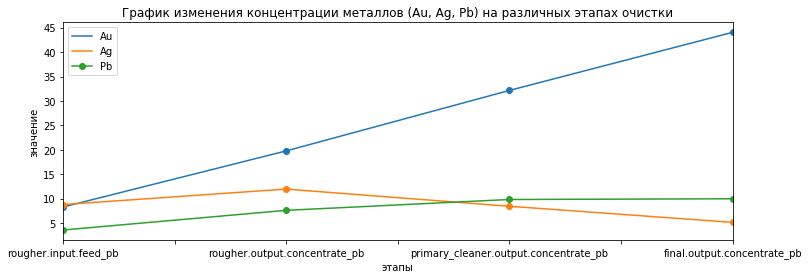

In [11]:
# Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
def concentration_graffic(data):
    data_au = data[['rougher.input.feed_au', 'rougher.output.concentrate_au',
                    'primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
    data_ag = data[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
                    'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
    data_pb = data[[ 'rougher.input.feed_pb', 'rougher.output.concentrate_pb',
                     'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
    print("Таблица металла Au")
    display(data_au.head())
    print("Таблица металла Ag")
    display(data_ag.head())
    print("Таблица металла PB")
    display(data_pb.head())
    
    print("Средние значения по этапам:")
    data_au = data_au.mean(axis=0)
    print(data_au)
    data_au.plot(style = 'o-', legend = True, figsize = (12,4), label='Au')
    data_ag = data_ag.mean(axis=0)
    print(data_ag)
    data_ag.plot(style = 'o-', legend = True, figsize = (12,4), label='Ag')
    data_pb = data_pb.mean(axis=0)
    print(data_pb)
    data_pb.plot(style = 'o-', legend = True, figsize = (12,4), label='Pb')
    plt.title("График изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки")
    plt.ylabel('значение')
    plt.xlabel('этапы')
    plt.show()
    
    
concentration_graffic(data_full)
#concentration_graffic(data_train)

   rougher.input.feed_size  primary_cleaner.input.feed_size
0                55.486599                             7.25
1                57.278666                             7.25
2                57.510649                             7.25
3                57.792734                             7.25
4                56.047189                             7.25

Среднее значение:
rougher.input.feed_size            60.045624
primary_cleaner.input.feed_size     7.330062
dtype: float64
Медианное значение:
rougher.input.feed_size            50.846843
primary_cleaner.input.feed_size     7.250000
dtype: float64

   rougher.input.feed_size  primary_cleaner.input.feed_size
0                62.710452                         8.080000
1                61.961163                         8.080000
2                66.903807                         7.786667
3                59.865919                         7.640000
4                63.315324                         7.530000

Среднее значение:
rougher.inp

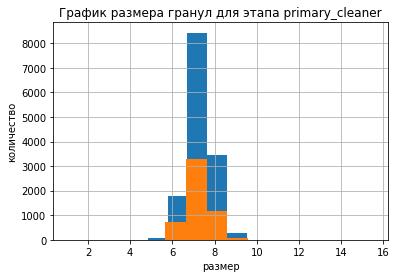

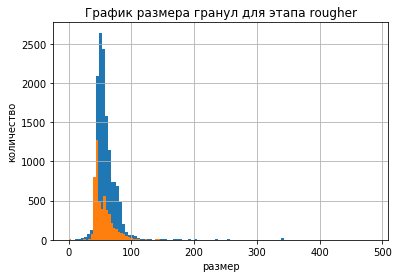

In [12]:
#Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

def feed_size(data, data1):
    data_train = data[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
    data_test = data1[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
    print(data_train.head())
    print()
    print("Среднее значение:")
    print(data_train.mean(axis = 0))
    print("Медианное значение:")
    print(data_test.median(axis = 0))
    print()
    print(data_test.head())
    print()
    print("Среднее значение:")
    print(data_test.mean(axis = 0))
    print("Медианное значение:")
    print(data_test.median(axis = 0))
    data_train['primary_cleaner.input.feed_size'].hist()
    data_test['primary_cleaner.input.feed_size'].hist()
    plt.title('График размера гранул для этапа primary_cleaner')
    plt.ylabel('количество')
    plt.xlabel('размер')
    plt.show()
    plt.show()
    data_train['rougher.input.feed_size'].hist(bins = 100)
    data_test['rougher.input.feed_size'].hist(bins = 100)
    plt.title('График размера гранул для этапа rougher')
    plt.ylabel('количество')
    plt.xlabel('размер')
    plt.show()

#feed_size(data_full, data_test)
feed_size(data_train, data_test)

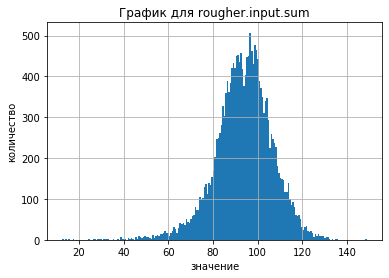

Минимальное значение rougher.input.sum: 12.521749185814805
Максимальное значение rougher.input.sum: 148.8047205276035



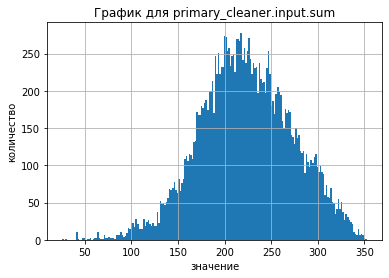

Минимальное значение primary_cleaner.input.sum: 25.957173915119114
Максимальное значение primary_cleaner.input.sum: 352.4780385031396



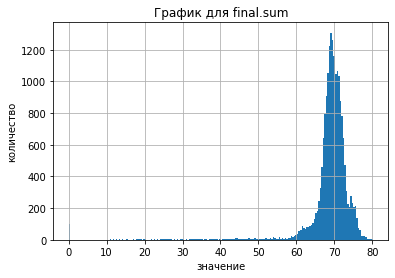

Минимальное значение final.sum: 0.0
Максимальное значение final.sum: 80.21064419582288



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.sum,primary_cleaner.input.sum,final.sum
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.517201,204.634007,63.644396
2016-01-15 01:00:00,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.644829,203.940856,63.957723
2016-01-15 02:00:00,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.852847,202.231146,64.311180
2016-01-15 03:00:00,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,86.783844,200.341817,63.573449
2016-01-15 04:00:00,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,82.171162,196.820034,64.004667


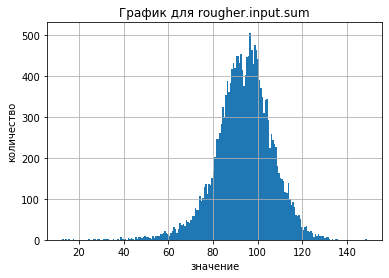

Минимальное значение rougher.input.sum: 12.521749185814805
Максимальное значение rougher.input.sum: 148.8047205276035



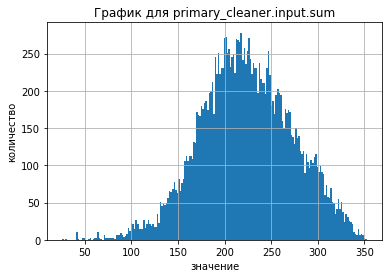

Минимальное значение primary_cleaner.input.sum: 25.957173915119114
Максимальное значение primary_cleaner.input.sum: 352.4780385031396



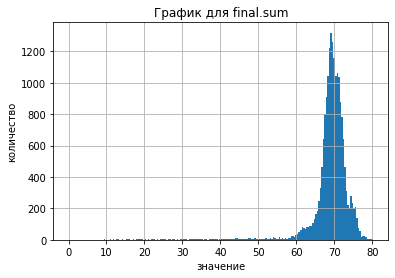

Минимальное значение final.sum: 0.03999999910593033
Максимальное значение final.sum: 80.21064419582288



In [13]:
# Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

list_sum = ['rougher.input.sum', 'primary_cleaner.input.sum', 'final.sum']

def sum_concentration(data):
    data['rougher.input.sum'] = (data['rougher.input.feed_ag'] +
                                 data['rougher.input.feed_pb'] +
                                 data['rougher.input.feed_sol'] +
                                 data['rougher.input.feed_au'] +
                                 data['rougher.input.floatbank10_sulfate'] +
                                 data['rougher.input.floatbank10_xanthate'] +
                                 data['rougher.input.floatbank11_sulfate'] +
                                 data['rougher.input.floatbank11_xanthate'])
    data['primary_cleaner.input.sum'] = (data['primary_cleaner.input.sulfate'] +
                                         data['primary_cleaner.input.depressant'] +
                                         data['primary_cleaner.input.xanthate'] +
                                         data['rougher.output.concentrate_ag'] +
                                         data['rougher.output.concentrate_pb'] +
                                         data['rougher.output.concentrate_sol'] +
                                         data['rougher.output.concentrate_au'])
    data['final.sum'] = (data['final.output.concentrate_ag'] +
                         data['final.output.concentrate_pb'] +
                         data['final.output.concentrate_sol'] +
                         data['final.output.concentrate_au'])
    for i in list_sum:
        plt.title(f'График для {i}')
        data[i].hist(bins = 200)
        plt.ylabel('количество')
        plt.xlabel('значение')
        plt.show()
        print(f"Минимальное значение {i}:", data[i].min())
        print(f"Максимальное значение {i}:", data[i].max())
        print()
    display(data.head())
    for i in list_sum:
        data = data[data[i] != 0]
    for i in list_sum:
        plt.title(f'График для {i}')
        data[i].hist(bins = 200)
        plt.ylabel('количество')
        plt.xlabel('значение')
        plt.show()
        print(f"Минимальное значение {i}:", data[i].min())
        print(f"Максимальное значение {i}:", data[i].max())
        print()
    
    
    
sum_concentration(data_full)
#sum_concentration(data_train)

In [14]:
def delete_sum_0(data):
    data = data[(data['rougher.input.feed_ag'] +
                 data['rougher.input.feed_pb'] +
                 data['rougher.input.feed_sol'] +
                 data['rougher.input.feed_au'] +
                 data['rougher.input.floatbank10_sulfate'] +
                 data['rougher.input.floatbank10_xanthate'] +
                 data['rougher.input.floatbank11_sulfate'] +
                 data['rougher.input.floatbank11_xanthate']) !=0]
    data = data[(data['primary_cleaner.input.sulfate'] +
                data['primary_cleaner.input.depressant'] +
                data['primary_cleaner.input.xanthate'] +
                data['rougher.output.concentrate_ag'] +
                data['rougher.output.concentrate_pb'] +
                data['rougher.output.concentrate_sol'] +
                data['rougher.output.concentrate_au']) !=0]
    data = data[(data['final.output.concentrate_ag'] +
                data['final.output.concentrate_pb'] +
                data['final.output.concentrate_sol'] +
                data['final.output.concentrate_au']) !=0]
    return data

data_full = delete_sum_0(data_full)
data_train = delete_sum_0(data_train)

## Вывод:
Мной проанализированны данные. Я посмотрила, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Концентрация золота линейно растет, что логично, т.к. это финальный продукт, к которому мы стремимся. И на выходе в среднем мы получаем 44% концентрацию золота. А вот концентрация металлов Ag и Pb после флотации повышается, но затем постепенно снижается до 5% и 10% соответственно.
Далее я сравнила распределения размеров гранул сырья на обучающей и тестовой выборках. Распределения соответствуют друг другу, что хорошо для качественного обучения модели. Среднии значения размеров гранул очень близки 60 для обучающей и 55 для тестовой, а вот медианные практически совпадают.
Я также исследовала суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. На всех этапах заметны аномальные значения в суммарном распределении. Мной принято решение удалить только нулевые сумарные значения, т.к. иначе, если мы воспользуемся правилось трех сигм или полуторным интервалом, наша модель может неправильно обучиться.

# Модель.

## Обучение моделей.

In [15]:
# sMAPE; features_target

def smape(target, predicted):
    sum_smape = 0
    target_new = target.reset_index(drop=True)
    for i in range(len(target)):
        first = 0
        second = 0
        sum_smape += (2*abs(target_new[i] - predicted[i])/(abs(target_new[i])+abs(predicted[i])))
        
         
    return (100*sum_smape/len(target))

def final_smape():
    f_smape = (0.25*smape(target_test_rougher, predicted_rougher)) + (0.75*smape(target_test_final, predicted_final))
    return f_smape

def features_target(data):
    list_abcent.extend(['date', 'rougher.output.recovery', 'final.output.recovery'])
    features = data.drop(list_abcent, axis = 1)
    target_1 = data['rougher.output.recovery']
    target_2 = data['final.output.recovery']
    
    return features, target_1, target_2

def features_target_test(data):
    features = data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)
    target_1 = data['rougher.output.recovery']
    target_2 = data['final.output.recovery']
        
    return features, target_1, target_2

In [16]:
#features_full, target_full_rougher, target_full_final = features_target(data_full)
features_train, target_train_rougher, target_train_final = features_target(data_train)
features_test, target_test_rougher, target_test_final = features_target_test(data_test)  

In [17]:
# LinearRegression

print("Результаты модели LinearRegression для целевого признака rougher")
model = LinearRegression()
final_score = sum(cross_val_score(model, features_train, target_train_rougher, cv = 5, scoring = "neg_mean_absolute_error"))/5
print('Средняя оценка качества модели по кросс-валидации:', final_score)
print()

print("Результаты модели LinearRegression для целевого признака final")
model = LinearRegression()
final_score = sum(cross_val_score(model, features_train, target_train_final, cv = 5, scoring="neg_mean_absolute_error"))/5
print('Средняя оценка качества модели по кросс-валидации:', final_score)

Результаты модели LinearRegression для целевого признака rougher
Средняя оценка качества модели по кросс-валидации: -8.9083782874093

Результаты модели LinearRegression для целевого признака final
Средняя оценка качества модели по кросс-валидации: -6.924976238776843


In [18]:
#RandomForestRegressor

print("Результаты модели RandomForestRegressor для целевого признака rougher")
model = RandomForestRegressor(n_estimators=16, max_depth = 4, random_state = 123)
final_score = sum(cross_val_score(model, features_train, target_train_rougher, cv = 5, scoring="neg_mean_absolute_error"))/5
print('Средняя оценка качества модели по кросс-валидации:', final_score)
print()

print("Результаты модели RandomForestRegressor для целевого признака final")
model = RandomForestRegressor(n_estimators=61, max_depth = 8, random_state = 123)
final_score = sum(cross_val_score(model, features_train, target_train_final, cv = 5, scoring="neg_mean_absolute_error"))/5
print('Средняя оценка качества модели по кросс-валидации:', final_score)

Результаты модели RandomForestRegressor для целевого признака rougher
Средняя оценка качества модели по кросс-валидации: -7.457361629669201

Результаты модели RandomForestRegressor для целевого признака final
Средняя оценка качества модели по кросс-валидации: -5.830943059596518


код для подбора параметров RandomForestRegressor

def model_RandomForestRegressor(features_train, target_train_rougher):
    n_estimatots = 0
    max_depth = 0
    best_final_score = -50
    for i in range(1,50,7):
        for j in range(1,76,15):
            model = RandomForestRegressor(random_state = 123, max_depth=i, n_estimators = j)
            final_score = sum(cross_val_score(model, features_train, target_train_rougher, cv = 4, scoring="neg_mean_absolute_error"))/4
            if best_final_score<final_score:
                best_final_score=final_score
                max_depth = i
                n_estimators = j

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth = max_depth, random_state = 123)
    final_score = sum(cross_val_score(model, features_train, target_train_rougher, cv = 5, scoring="neg_mean_absolute_error"))/5
    print('Средняя оценка качества модели по кросс-валидации:', final_score)
    print("Лучшая глубина:", max_depth, "   |   Лучшее кол-во деревьев:", n_estimators)
    print()

    
print("Результаты модели model_RandomForestRegressor для целевого признака rougher")  
model_RandomForestRegressor(features_train, target_train_rougher)
print("Результаты модели model_RandomForestRegressor для целевого признака final")
model_RandomForestRegressor(features_train, target_train_final)

In [19]:
# DecisionTreeRegressor

print("Результаты модели DecisionTreeRegressor для целевого признака rougher")
model = DecisionTreeRegressor(random_state = 123)
final_score = sum(cross_val_score(model, features_train, target_train_rougher, cv = 5, scoring = 'neg_mean_absolute_error'))/5
print('Средняя оценка качества модели по кросс-валидации:', final_score)
print()

print("Результаты модели DecisionTreeRegressor для целевого признака final")
model = DecisionTreeRegressor(random_state = 123)
final_score = sum(cross_val_score(model, features_train, target_train_final, cv = 5, scoring="neg_mean_absolute_error"))/5
print('Средняя оценка качества модели по кросс-валидации:', final_score)

Результаты модели DecisionTreeRegressor для целевого признака rougher
Средняя оценка качества модели по кросс-валидации: -11.569817626456793

Результаты модели DecisionTreeRegressor для целевого признака final
Средняя оценка качества модели по кросс-валидации: -9.530186893569438


In [20]:
# DummyClassifier проверка модели на адекватность

print("Результаты модели DummyRegressor для целевого признака rougher (проверка модели на адекватность)")
model = DummyRegressor(strategy='median')
final_score = sum(cross_val_score(model, features_train, target_train_rougher, cv = 5, scoring="neg_mean_absolute_error"))/5
print('Средняя оценка качества модели по кросс-валидации:', final_score)
print()

print("Результаты модели DummyRegressor для целевого признака final (проверка модели на адекватность)")
model = DummyRegressor(strategy='median')
final_score = sum(cross_val_score(model, features_train, target_train_final, cv = 5, scoring="neg_mean_absolute_error"))/5
print('Средняя оценка качества модели по кросс-валидации:', final_score)
print()


#print("Итоговое sMAPE", final_smape())
print()

Результаты модели DummyRegressor для целевого признака rougher (проверка модели на адекватность)
Средняя оценка качества модели по кросс-валидации: -8.104791326773029

Результаты модели DummyRegressor для целевого признака final (проверка модели на адекватность)
Средняя оценка качества модели по кросс-валидации: -6.713438906529737




## Проверка модели на тестовых данных.

In [21]:
#проверим модель на тестовых данных

print("Результаты модели RandomForestRegressor для целевого признака rougher")
model = RandomForestRegressor(n_estimators=16, max_depth = 4, random_state = 123)
model.fit(features_train, target_train_rougher)
predicted_rougher = model.predict(features_test)
print("MAE: ", mean_absolute_error(target_test_rougher, predicted_rougher))
mse = mean_squared_error(target_test_rougher, predicted_rougher)
print("MSE:", mse)
print("RMSE:", mse ** 0.5)
print("R2:", r2_score(target_test_rougher, predicted_rougher))
print()

print("Результаты модели RandomForestRegressor для целевого признака final")
model = RandomForestRegressor(n_estimators=61, max_depth = 8, random_state = 123)
model.fit(features_train, target_train_final)
predicted_final = model.predict(features_test)
print("MAE: ", mean_absolute_error(target_test_final, predicted_final))
mse = mean_squared_error(target_test_final, predicted_final)
print("MSE:", mse)
print("RMSE:", mse ** 0.5)
print("R2:", r2_score(target_test_final, predicted_final))
print()

print("Итоговое sMAPE", final_smape())

Результаты модели RandomForestRegressor для целевого признака rougher
MAE:  7.463661150810723
MSE: 203.49849758916648
RMSE: 14.265289958117448
R2: -0.1901009857777809

Результаты модели RandomForestRegressor для целевого признака final
MAE:  5.906686854479782
MSE: 87.78389648233264
RMSE: 9.36930608328774
R2: 0.02997610513074822

Итоговое sMAPE 10.067829464825929


In [22]:
#DummyClassifier проверка модели на адекватность

print("Результаты модели DummyRegressor для целевого признака rougher (проверка модели на адекватность)")
model = DummyRegressor(strategy='median')
model.fit(features_train, target_train_rougher)
predicted_rougher = model.predict(features_test)
print("MAE: ", mean_absolute_error(target_test_rougher, predicted_rougher))
mse = mean_squared_error(target_test_rougher, predicted_rougher)
print("MSE:", mse)
print("RMSE:", mse ** 0.5)
print("R2:", r2_score(target_test_rougher, predicted_rougher))
print()

print("Результаты модели DummyRegressor для целевого признака final (проверка модели на адекватность)")
model = DummyRegressor(strategy='median')
model.fit(features_train, target_train_final)
predicted_final = model.predict(features_test)
print("MAE: ", mean_absolute_error(target_test_final, predicted_final))
mse = mean_squared_error(target_test_final, predicted_final)
print("MSE:", mse)
print("RMSE:", mse ** 0.5)
print("R2:", r2_score(target_test_final, predicted_final))
print()

print("Итоговое sMAPE", final_smape())

Результаты модели DummyRegressor для целевого признака rougher (проверка модели на адекватность)
MAE:  5.6899152977371745
MSE: 171.10950364634672
RMSE: 13.080883137095398
R2: -0.0006835007528083192

Результаты модели DummyRegressor для целевого признака final (проверка модели на адекватность)
MAE:  6.026132171583558
MSE: 91.45181616282785
RMSE: 9.563044293676981
R2: -0.010554902002862354

Итоговое sMAPE 9.453636460331435


## Вывод:

Я обучила разные модели и оцените их качество кросс-валидацией. Лучше всего в прогнозе признака rougher себя показала модель RandomForestRegressor с параметрами n_estimators=16, max_depth = 4 для ц.признака rougher (средняя оценка качества модели по кросс-валидации: -7,4) и с параметрами n_estimators=61, max_depth =8 для ц.признака final (средняя оценка качества модели по кросс-валидации: -5,8). Это единственная модель, которая показала результаты лучше чем dummy-модель ((-8,1 для rougher и -6,7 для final)), где ц. признак заполняется медианным значением. Проверев модель RandomForestRegressor на тестовой выборке, я получила следующие результаты для целевого признака rougher: MAE  7.4, RMSE 14.2, R2 -0.19; и для целевого признака final: MAE  5.9, RMSE 9.3, R2 0.02. Дополнительно я использовала метрику sMAPE. Итоговое sMAPE для рандомного леса равно 10, в сравнении итоговое sMAPE dummy-модели 9.4. Модель отработала лучше по ц. признаку final.

# Итоговый вывод.

Я загрузила 3 таблицы с данными технологического процесса добычи золота из руды. Датасет data_full состоит из 22716 строк и 87 колонок; датасет data_train состоит из 16860 строк и 87 колонок; датасет data_test состоит из 5856 строк и 53 колонок. Дублей нет, типы колонок кроме "даты" корректны. Часть данных пропущена. Я перевела дату в формат даты, удалила строки, где вес изночального сырья равен 0 или отсутствуют значения по всем 3 элементам (au, pb, ag). Также в датасетах full и train я удалила строки с пустыми значениями целевого признака 'rougher.output.recovery' и 'final.output.recovery'. Итого у меня получились следующие размеры датасетов: full(19339, 87), train (14049, 87), test(5290, 55). Остальные пропущенные данные я заполнила методом интерполяции. Я проверила, что эффективность обогащения рассчитана правильно, вычислив её на полной (full) и обучающей выборке (train) для признака rougher.output.recovery. MAE между моими расчётами и значением признака практически равно нулю. Также я проанализировала признаки, недоступные в тестовой выборке, их 32, т.к. 2 целевых признака я добавила в тест. Отсутствующие признаки это выходные параметры, на которые мы не можем повлиять и которые зависят от того, что подается на вход в сырье и концентрате. В дальнейшем данные столбцы можно будет удалить на обучающей выборке перед обучением модели.
Мной проанализированны данные. Я посмотрила, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Концентрация золота линейно растет, что логично, т.к. это финальный продукт, к которому мы стремимся. И на выходе в среднем мы получаем 44% концентрацию золота. А вот концентрация металлов Ag и Pb после флотации повышается, но затем постепенно снижается до 5% и 10% соответственно.
Далее я сравнила распределения размеров гранул сырья на обучающей и тестовой выборках. Распределения соответствуют друг другу, что хорошо для качественного обучения модели. Среднии значения размеров гранул очень близки 60 для обучающей и 55 для тестовой, а вот медианные практически совпадают.
Я также исследовала суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. На всех этапах заметны аномальные значения в суммарном распределении. Мной принято решение удалить только нулевые сумарные значения, т.к. иначе, если мы воспользуемся правилось трех сигм или полуторным интервалом, наша модель может неправильно обучиться.
Я обучила разные модели и оцените их качество кросс-валидацией. Лучше всего в прогнозе признака rougher себя показала модель RandomForestRegressor с параметрами n_estimators=16, max_depth = 4 для ц.признака rougher (средняя оценка качества модели по кросс-валидации: -7,4) и с параметрами n_estimators=61, max_depth =8 для ц.признака final (средняя оценка качества модели по кросс-валидации: -5,8). Это единственная модель, которая показала результаты лучше чем dummy-модель ((-8,1 для rougher и -6,7 для final)), где ц. признак заполняется медианным значением. Проверев модель RandomForestRegressor на тестовой выборке, я получила следующие результаты для целевого признака rougher: MAE  5.9, RMSE 11.5, R2 0.36; и для целевого признака final: MAE  3.86, RMSE 5.57, R2 0.63. Дополнительно я использовала метрику sMAPE. Итоговое sMAPE для рандомного леса равно 7,1, в сравнении итоговое sMAPE dummy-модели 10.3. Модель отработала лучше по ц. признаку final.
